In [1]:
%%html
<style>
.rendered_html 
p {
    font-size: 16px;
    font-family: 'Times New Roman'
}

a {
    font-size: 20px;
    font-family: Garamond
}

#bullet {
    font-size:18px;
}

ul {
    content: "";
    margin-left: -1rem;
    font-family: Arial;
}

a:hover {
    color: red;
}
    

    
</style>

## Contents

1. [Setting up data](#1)
<ul>
    <li><a id=bullet href=#1.1>Importing Libraries</a></li>
    <li><a id=bullet href=#1.2>Dataset</a></li>
</ul>
<br>
2. [Sentiment of Deleted vs Non-Deleted Tweets](#2)
<ul>
    <li><a id=bullet href=#2.1>Seperating data</a> </li>
    <li><a id=bullet href=#2.2>Sentiment Explanation</a> </li>
</ul>
<br>
3. [Visualizing Data](#3)
<ul>
    <li><a id=bullet href=#3.1>Sensational words vs Frequency</li></a>
    <li><a id=bullet href=#3.2>Sensational words vs Sentiment</li></a>
    <li><a id=bullet href=#3.3>Analyzing Text Statistics</li></a>
    <ul>
        <li><a id=bullet href=#3.3.1>Characters</li></a>
        <li><a id=bullet href=#3.3.2>Words</li></a>
        <li><a id=bullet href=#3.4>N-gram Sequencing</li></a>
        <li><a id=bullet href=#3.5>Latent Dirichlent Allocation</li></a>
        <ul>
            <li><a id=bullet href=#3.5.1>How do they learn?</li></a>
            <li><a id=bullet href=#3.5.2>Bayes Theorem</li></a>
        </ul>
        <li><a id=bullet href=#3.6>Named Entity Recognition</li></a>
        <li><a id=bullet href=#3.7>Flesch Readability Score</li></a>
    </ul>
    <li>
</ul>
4. [Text Generation](#4)
<ul>
    <li><a id=bullet href=#4.1>Importing</li></a>
    <li><a id=bullet href=#4.2>Preprocessing Text</li></a>
    <li><a id=bullet href=#4.3>Processing Text</li></a>
    <li><a id=bullet href=#4.4>Building Model</li></a>
    <li><a id=bullet href=#4.5>Generating/Outputting Text</li></a>
</ul>

<a class="anchor" id="1"></a>
## Setting up Data


Kaggle offers a numerous amount of datasets created, and shared, by data scientists and machine learning practictioners. I found a dataset that contains Donald J. Trumps deleted and non-deleted tweets before his controversial ban.

<a class='anchor' id='1.1'></a>
### Importing Libraries
<br>

In [2]:
import os


try:
    import pandas as pd
    import numpy as np
    import nltk
    import collections
    import opendatasets as od
    import copy
    import matplotlib.pyplot as plt
    import seaborn as sns
    from adjustText import adjust_text

    import plot_utils
    import statistics
    import ipywidgets as widgets
    from ipywidgets import interact, fixed

    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.decomposition import LatentDirichletAllocation
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    import spacy
    import textstat
    import contractions
    import pynytimes
except:
    !pip install adjustText
    !pip install sklearn
    !pip install en_core_web_sm
    !pip install textstat
    !pip install opendatasets
    !pip install selenium
    !pip install ipywidgets
    !pip install sklearn
    !pip install spacy
    !pip install contractions
    !pip install tensorflow
    !python -m spacy download en_core_web_sm
    !pip install collections
    !pip install nltk
    !pip install matplotlib
    !pip install pandas
    !pip install numpy
    !pip install seaborn
    !pip install bs4
    !pip install pynytimes
    
    import pandas as pd
    import numpy as np
    import opendatasets as od
    import nltk
    import collections
    import copy
    import matplotlib.pyplot as plt
    import seaborn as sns
    from adjustText import adjust_text

    import plot_utils
    import statistics
    import ipywidgets as widgets
    from ipywidgets import interact, fixed

    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.decomposition import LatentDirichletAllocation
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    import spacy
    import textstat
    import contractions
    import pynytimes
    

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-08-15 14:07:28.524738: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2022-08-15 14:07:28.524755: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-15 14:07:30.330178: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2022-08-15 14:07:30.338974: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-08-15 14:07:30.341960: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-9N01K1G
2022-08-15 14:07:30.342013: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-9N01K1G
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching dist

  Attempting uninstall: idna
    Found existing installation: idna 3.3
    Uninstalling idna-3.3:
      Successfully uninstalled idna-3.3
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1


In [3]:
nltk.download('vader_lexicon')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Memo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
od.download('https://www.kaggle.com/datasets/headsortails/trump-twitter-archive')

Skipping, found downloaded files in ".\trump-twitter-archive" (use force=True to force download)


In [5]:
trump_tweets = pd.read_csv('trump-twitter-archive/trump_tweets.csv')

<a class='anchor' id="1.2"></a>
### Dataset

The dataset contains a csv file containing the id of the tweet, the tweet text, if the tweet is a retweet, if the tweet is deleted, the device used to make the tweet, the number of favorites, the number of retweets, the date it was posted, if the tweet was flagged, and the date.

In [6]:
trump_tweets.head()

,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date
0,9.845497e+16,Republicans and Democrats have both created ou...,False,False,TweetDeck,49,255,2011-08-02T18:07:48Z,False,2011-08-02
1,1.234653e+18,I was thrilled to be back in the Great city of...,False,False,Twitter for iPhone,73748,17404,2020-03-03T01:34:50Z,False,2020-03-03
2,1.218011e+18,RT @CBS_Herridge: READ: Letter to surveillance...,True,False,Twitter for iPhone,0,7396,2020-01-17T03:22:47Z,False,2020-01-17
3,1.304875e+18,The Unsolicited Mail In Ballot Scam is a major...,False,False,Twitter for iPhone,80527,23502,2020-09-12T20:10:58Z,False,2020-09-12
4,1.218160e+18,RT @MZHemingway: Very friendly telling of even...,True,False,Twitter for iPhone,0,9081,2020-01-17T13:13:59Z,False,2020-01-17


In [7]:
trump_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56571 entries, 0 to 56570
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          56571 non-null  float64
 1   text        56571 non-null  object 
 2   is_retweet  56571 non-null  bool   
 3   is_deleted  56571 non-null  bool   
 4   device      56571 non-null  object 
 5   favorites   56571 non-null  int64  
 6   retweets    56571 non-null  int64  
 7   datetime    56571 non-null  object 
 8   is_flagged  56571 non-null  bool   
 9   date        56571 non-null  object 
dtypes: bool(3), float64(1), int64(2), object(4)
memory usage: 3.2+ MB


In [8]:
trump_tweets.describe()

,id,favorites,retweets
count,5.657100e+04,5.657100e+04,56571.000000
mean,7.987865e+17,2.834955e+04,8618.987467
std,3.826616e+17,5.781564e+04,13306.132408
min,1.698309e+09,0.000000e+00,0.000000
25%,4.606192e+17,1.000000e+01,59.000000
50%,7.471024e+17,1.640000e+02,3450.000000
75%,1.193134e+18,4.393850e+04,13014.500000
max,1.347570e+18,1.869706e+06,408866.000000


Takeaways:
* The highest number of likes is around 1.7 million likes
* The highest number of retweets is 408,000
* There are non-null values, so no tweets have to be dropped

<a class="anchor" id="2"></a>
## Relationship between Sentiment of deleted tweets and non-deleted tweets


Is there a relationship between the sentiment score of tweets that are deleted and ones that are not? 

### Seperating dataframe into nondeleted tweets and deleted/not_retweeted tweets
<a class='anchor' id='2.1'></a>

#### Key Notations:
* df_notdeleted: contains tweets that were not deleted
* df_deleted: contains tweets that are deleted and were not retweets

In [9]:
import copy

In [10]:
df_notdeleted = copy.deepcopy(trump_tweets)

#df_notdeleted.drop(df_notdeleted.loc[df_notdeleted['is_deleted']].index, inplace=True)
#df_notdeleted = pd.DataFrame(df_notdeleted['text'])
df_deleted = pd.DataFrame(trump_tweets.loc[(trump_tweets['is_deleted']) & (trump_tweets['is_retweet'] == False)]['text'])
df_notdeleted = pd.DataFrame(trump_tweets.loc[(trump_tweets['is_retweet'] == False) & (trump_tweets['is_deleted'] == False)]['text'])

<a class='anchor' id='2.2'></a>
### How does Sentiment Intensity Analyser work?


Sentiment Intensity Analyzer (sid) is an AI bot that is trained on millions of pieces of text. Each text is labeled (supervised learning) with either a positive, negative, or neutral score. In other words, a sentence is a collection of positive, negative, and neutral words, and by taking the compound score, you can figure out if it is a pos, neg, or netural sentence.

Example:

Imagine reading the sentence 'The blue dog is horrendous!' 

Using sid's built-in function $polarity\ scores$, the object returns:

[('The', 0.0),<br>
 ('blue', 0.0),<br>
 ('dog', 0.0),<br>
 ('is', 0.0),<br>
 ('horrendous!', -0.6239)]
 
 Taking the sum of all the scores gives -0.6239, concluding that the sentence is negative.
 

For Trump's twitter, we're going to run Sentiment Analysis on every tweet to determine if it is positive or negative.

In [11]:
sid = SentimentIntensityAnalyzer()
polarity_scores_deleted = []
polarity_scores_not_deleted = []

for row in df_deleted['text']:
    polarity_scores_deleted.append(sid.polarity_scores(row)['compound'])

for row in df_notdeleted['text']:
    polarity_scores_not_deleted.append(sid.polarity_scores(row)['compound'])
    

df_deleted['Scores'] = polarity_scores_deleted
df_notdeleted['Scores'] = polarity_scores_not_deleted

## Sentiment on tweets that contain sensational topics / words


In [12]:
impact_words = ['election', 'scam', 'fraud', 'democrat', 'republican', 'republic', 'scotus', 'house', 'senate', 'biden', 'president', 'media', 'cnn', 'fox', 'covid']

words = ' '.join(df_notdeleted['text']).lower()
counter = collections.Counter(words.split())


for word in impact_words:
    print(f'{word}: {counter[word]}')

election: 508
scam: 71
fraud: 104
democrat: 402
republican: 618
republic: 17
scotus: 5
house: 515
senate: 221
biden: 427
president: 1859
media: 659
cnn: 129
fox: 212
covid: 25


In [13]:
def get_compound_score(impact_words, df):
    words = ' '.join(df['text']).lower()
    counter = collections.Counter(words.split())
    data = {}
    
    
    for word in impact_words:
        data[word] = [counter[word], sum(df.loc[df['text'].str.contains(word)]['Scores'])]
        
    return data 

data = get_compound_score(impact_words, df_notdeleted)
data

{'election': [508, 57.81889999999999],
 'scam': [71, -27.9705],
 'fraud': [104, -114.29990000000002],
 'democrat': [402, 3.2910000000000004],
 'republican': [618, 4.5711],
 'republic': [17, 6.303400000000001],
 'scotus': [5, 0],
 'house': [515, 32.25169999999999],
 'senate': [221, 13.047999999999998],
 'biden': [427, 0],
 'president': [1859, 237.13360000000023],
 'media': [659, -11.192999999999985],
 'cnn': [129, 6.949200000000001],
 'fox': [212, 154.6189000000001],
 'covid': [25, 0]}

In [14]:
data.values()

dict_values([[508, 57.81889999999999], [71, -27.9705], [104, -114.29990000000002], [402, 3.2910000000000004], [618, 4.5711], [17, 6.303400000000001], [5, 0], [515, 32.25169999999999], [221, 13.047999999999998], [427, 0], [1859, 237.13360000000023], [659, -11.192999999999985], [129, 6.949200000000001], [212, 154.6189000000001], [25, 0]])

In [15]:
df_notdeleted.head()

,text,Scores
0,Republicans and Democrats have both created ou...,-0.1779
1,I was thrilled to be back in the Great city of...,0.9792
3,The Unsolicited Mail In Ballot Scam is a major...,-0.9551
6,Getting a little exercise this morning! https:...,0.0000
7,https://t.co/4qwCKQOiOw,0.0000


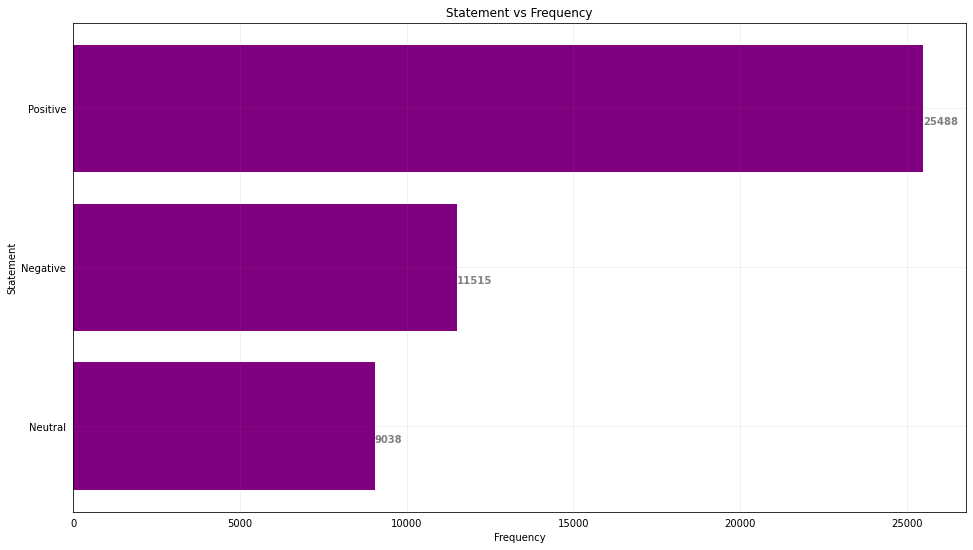

In [16]:
statement = df_notdeleted['Scores'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
counter = collections.Counter(statement)

# Sorting to descending order
counter = sorted(counter.items(), key=lambda x: x[1], reverse=True)
# seperating for plotting
state, count = map(list, zip(*counter))


plot_utils.plot_topics(state, count, ['Statement', 'Frequency'])

## Visualizing Data
<a class='anchor' id='3'></a>

It is important to visualize data to understand how sparse the data is. This section includes:

<ul>
    <li> 1. Graphing Sentiment for each word </li>
    <li> 2. to continue </li>
    
</ul>

<a class='anchor' id='3.1'></a>
### Sensational words vs Frequency

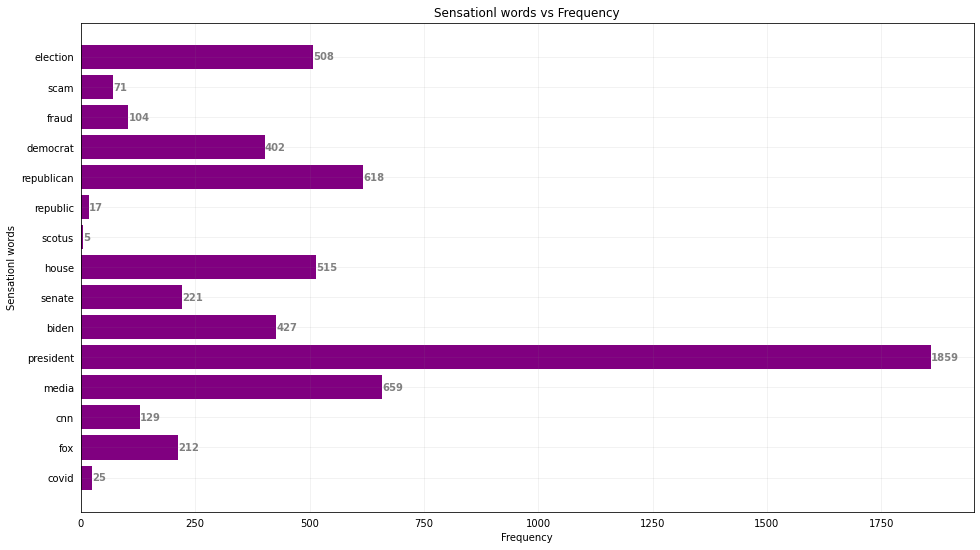

In [17]:
impact_words = list(data.keys())
frequency_words = [value[0] for value in data.values()]

def plot_topics(topic1, topic2, topic_names):
    fig, ax = plt.subplots(figsize=(16,9))
    colors = []
    
    for val in topic2:
        colors.append('red' if val < 0 else 'purple')
    
    
    ax.barh(topic1, topic2, color=colors)

    # remove x, y ticks
    ax.xaxis.set_ticks_position('none'), ax.yaxis.set_ticks_position('none')

    # Add x, y, gridlines
    ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.2)

    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        if i.get_width() < 0:
            plt.text(i.get_width()-20, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='red')
        else:
            plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')
        

    ax.set_title(f'{topic_names[0]} vs {topic_names[1]}')
    ax.set_xlabel(f'{topic_names[1]}'),ax.set_ylabel(f'{topic_names[0]}')

    plt.show()
    
plot_topics(impact_words, frequency_words, ['Sensationl words', 'Frequency'])

<a class='anchor' id='3.2'></a>
### Sensational words vs Sentiment

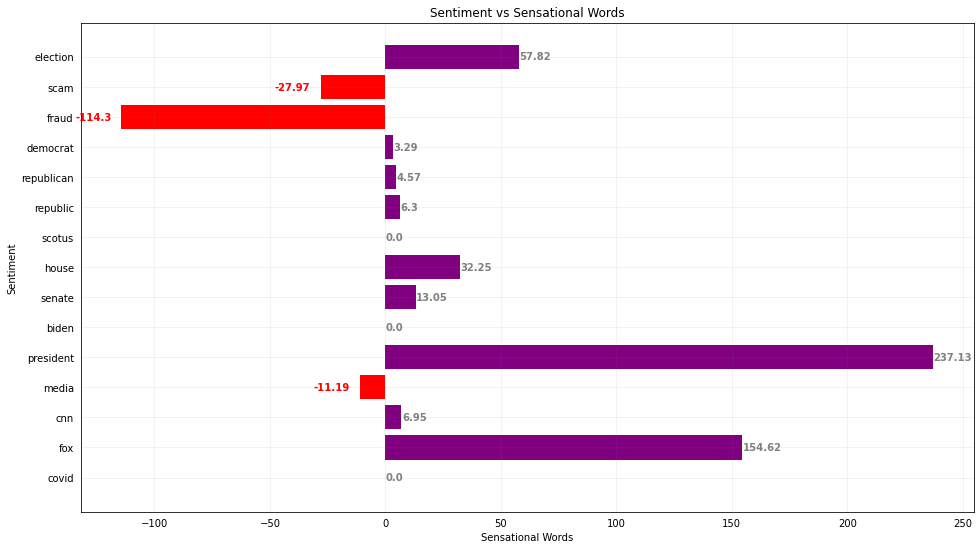

In [18]:
impact_words = list(data.keys())
sentiment = [value[1] for value in data.values()]

ax = plot_topics(impact_words, sentiment, ['Sentiment', 'Sensational Words'])


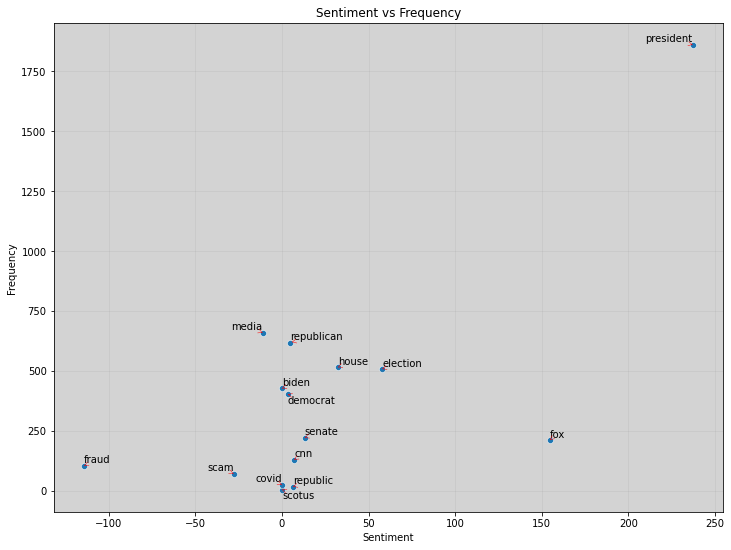

In [19]:
import warnings

warnings.filterwarnings("ignore")



sentiment = sentiment
frequency_words = frequency_words
impact_words = impact_words

def plot_sent_frequency(sent, freq, names):
    fig, ax = plt.subplots(figsize=(12, 9))
    
    sns.scatterplot(sent, freq)

    ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.2)
    ax.set_facecolor('lightgrey')

    texts = []
    for label, x,  y, in zip(names, sent, freq):
        """
        args:

        Label: contains the text we want to annotate the point with
        x: the x-value/coord of the point
        y: the y-value/coord of the point

        Returns:
            Annotation of each point
        """
        texts.append(plt.text(x, y, label))

    ax.set_xlabel('Sentiment'), ax.set_ylabel('Frequency')    
    ax.set_title('Sentiment vs Frequency')

    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
    
    plt.show()


plot_sent_frequency(sentiment, frequency_words, impact_words)

In [20]:
sen_names = plot_utils.get_senate_names()

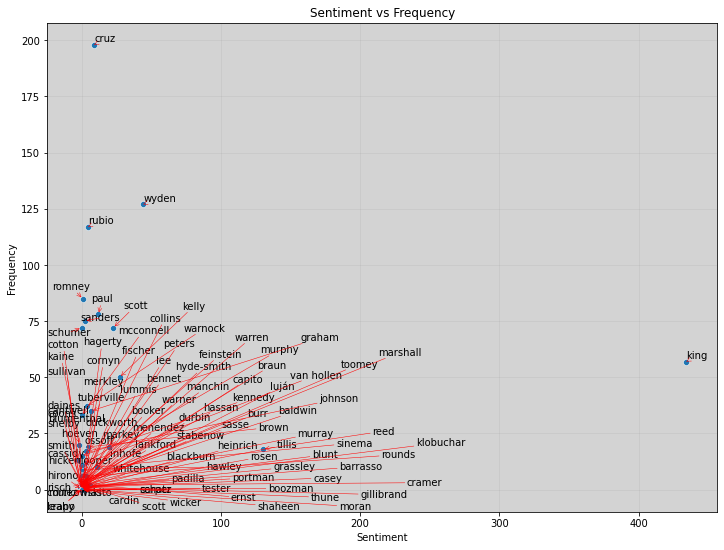

In [21]:
senators = []

for senator in sen_names:
    senators.append(senator[0].split(',')[0].lower())

sen_freq_sent = plot_utils.get_compound_score(senators, df_notdeleted)
sen = list(sen_freq_sent.keys())
sen_freq = [value[0] for value in sen_freq_sent.values()]
sen_sent = [value[1] for value in sen_freq_sent.values()]


plot_sent_frequency(sen_sent, sen_freq, senators)

<a class='anchor' id='3.3'></a>
### Analyzing Text Statistics

<a class='anchor' id='3.3.1'></a>
### Characters per deleted/non_deleted tweet

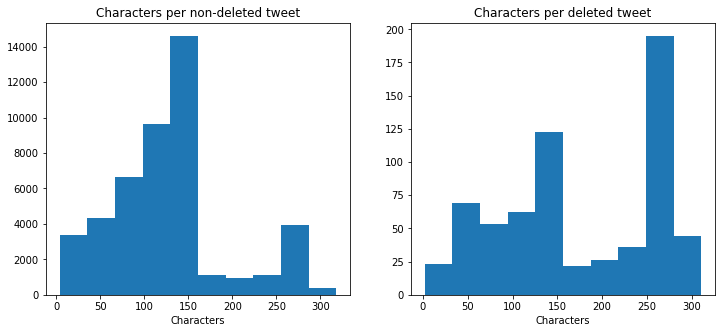

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.hist(df_notdeleted['text'].str.len())
ax2.hist(df_deleted['text'].str.len())

ax1.set_title('Characters per non-deleted tweet'), ax2.set_title('Characters per deleted tweet')
ax1.set_xlabel('Characters'), ax2.set_xlabel('Characters')


plt.show()

In [23]:
df_notdeleted.head()

,text,Scores
0,Republicans and Democrats have both created ou...,-0.1779
1,I was thrilled to be back in the Great city of...,0.9792
3,The Unsolicited Mail In Ballot Scam is a major...,-0.9551
6,Getting a little exercise this morning! https:...,0.0000
7,https://t.co/4qwCKQOiOw,0.0000


Important takeaways:
* Non-deleted tweets contain around 50-160 characters
* Deleted tweets vary

<a class='anchor' id='3.3.2'></a>
### Words per deleted/non_deleted tweet

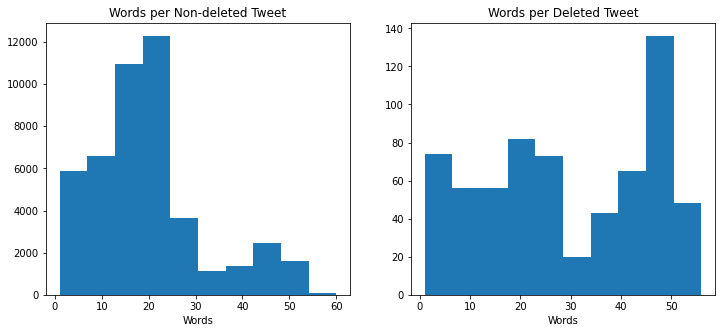

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.hist(df_notdeleted['text'].str.split().map(lambda x: len(x)))
ax2.hist(df_deleted['text'].str.split().map(lambda x: len(x)))

ax1.set_title('Words per Non-deleted Tweet'), ax2.set_title('Words per Deleted Tweet')
ax1.set_xlabel('Words'), ax2.set_xlabel('Words')

plt.show()

Takeaways:
* Non-deleted Tweets is right-skewed and generally contains 10-25 words.
* Deleted Tweets vary

<a class='anchor' id='3.4'></a>
### N-gram Sequencing

Some words have important contextual meanings. Examples include: 'standby', 'call for', 'call in', 'vietnam war', etc.. In order to perform N-gram Sequencing, you first use CountVectorizer to vectorize each sentence.

In [25]:
import string
import re
"""
def process_text(corpus):
    new_stopwords = nltk.corpus.stopwords.words('english')
    new_stopwords.extend(['https', 'rt'])

    output = []
    for sentence in corpus:
        for word in sentence.split(' '):
            if re.sub(r'^https?:\/\/.*[\r\n]*', '', word, flags=re.MULTILINE) and re.sub(r'[^A-Za-z].*[\r\n]*', '', word, flags=re.MULTILINE) and word.lower() not in new_stopwords:
                clean_word = re.sub(r'[^\w\s]', '', word).lower()
                output.append(clean_word.replace('\n', ''))

    return output
"""

# Must be a list
def process_text_test(df):
    new_stopwords = nltk.corpus.stopwords.words('english')
    new_stopwords.extend(['https', 'rt'])
    

    new_row = []
    for index, row in enumerate(df):
        output = []
        for word in row.split(' '):
            if re.sub(r'^https?:\/\/.*[\r\n]*', '', word, flags=re.MULTILINE) and re.sub(r'[^A-Za-z].*[\r\n]*', '', word, flags=re.MULTILINE) and word.lower() not in new_stopwords:
                clean_word = re.sub(r'[^\w\s]', '', word).lower()
                #output.append(''.join(clean_word.replace('\n', '')))
                output.append(clean_word.replace('\n', ''))
        new_row.append([' '.join(output)])
        

    df_test = pd.DataFrame(new_row, columns=['Text'])
    return df_test

In [26]:
@interact(corpus=fixed(process_text_test(df_notdeleted['text'])['Text'].tolist()), n=(1,5))
def get_top_ngrams(corpus, n=2):
    vectorizer = CountVectorizer(ngram_range=(n,n)).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = []
    for word, idx, in vectorizer.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
    
    
    bigram_occurance = sorted(words_freq, key = lambda x: x[1], reverse=True)[:10]
    
    bigram_lst = [value[0] for value in bigram_occurance]
    occurance_lst = [value[1] for value in bigram_occurance]
    
    plot_topics(bigram_lst, occurance_lst, ['Words', 'Occurance'])

#corpus = output

#bigram_occurance = get_top_ngrams([output], n=2)

interactive(children=(IntSlider(value=2, description='n', max=5, min=1), Output()), _dom_classes=('widget-inte…

<a class='anchor' id="3.5"></a>
### Using LatentDirichlentAllocation(LDA)

LDA follows the idea that documents are a representation of a bunch of topics, and a topic is a representation of a bunch of words. 

<a class='anchor' id="3.5.1"></a>
#### How do they learn?
Assumptions
* Values of each variable vary around the mean by the same amount on the average
* Each variable is shaped in the form of a bell curve

<a class='anchor' id="3.5.2"></a>
#### Bayes Theorem
$$ P(A|B) = \frac{P(B|A) * P(A)}{P(B)} $$

Where $ A $ contains topics and $ B $ contains documents

In [27]:
def graph_topics(preprocessed_text):
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(['https', 'rt'])
    count = CountVectorizer(stop_words=stopwords)
    dtm = count.fit_transform(preprocessed_text)
    
    LDA = LatentDirichletAllocation(n_components=9, random_state=42)
    LDA.fit(dtm)
    
    
    fig, axes = plt.subplots(3, 3, figsize=(16, 12), sharex=False)
    axes = axes.flatten()
    
    for index, topic in enumerate(LDA.components_):
        top_features_weight = topic.argsort()[-10:]
        weights = topic[top_features_weight]
        names = [count.get_feature_names()[i] for i in topic.argsort()[-10:]]
        
        
        ax = axes[index]
        ax.barh(names, weights, color='purple')
        ax.set_title(f'Topic {index+1}'), ax.set_xlabel('Weights'), ax.set_ylabel('Word')
                 
        for i in ax.patches:
            ax.text(i.get_width()+0.2, i.get_y(),
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')
                


#text = (process_text_test(df_notdeleted['text'])['Text'].tolist())
#graph_topics(text)

<a class='anchor' id="3.6"></a>
### Named Entity Recognition

Named Entity Recognition (NER) contains a large labeled dataset. The dataset (en_core_web_sm) is a small English pipeline trained on written web text. 

First, spacy takes the parameter of the dataset and creates an nlp object. Passing a series of text into the object and then checking the entity returns the entity that a particular word belongs to.

For instance, companies like Amazon, Apple, and Google are all organizations, therefore spacy returns an 'ORG' label.

#### NER on latest five tweets

In [28]:
text = ' '.join(df_notdeleted['text'].head().tolist())
doc = nlp(text)

for word in doc.ents:
    print((word.text, word.label_))

('Republicans', 'NORP')
('Democrats', 'NORP')
('Great', 'GPE')
('Charlotte', 'GPE')
('North Carolina', 'GPE')
('thousands', 'CARDINAL')
('American Patriots', 'ORG')
('evening', 'TIME')
('#KAG2020 https://t.co/dNJZfRsl9y', 'MONEY')
('Ballot Scam', 'PERSON')
('Democrats', 'NORP')
('Ballots', 'ORG')
('Ballots & Fraud', 'ORG')


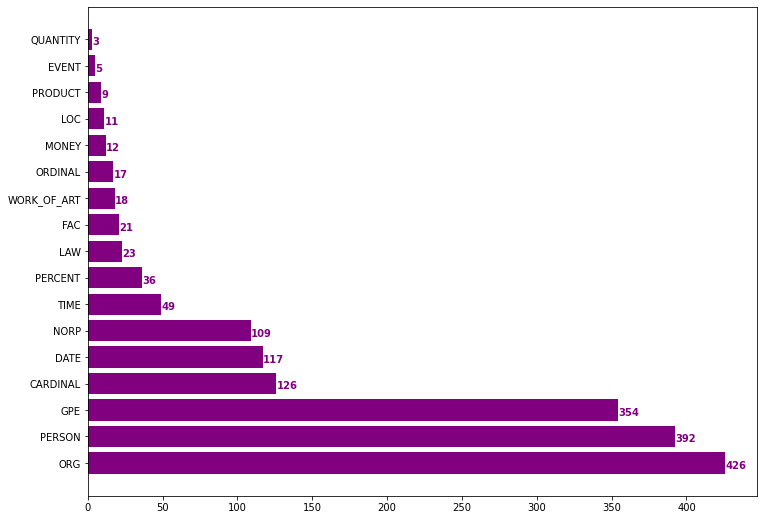

In [29]:
def plot_entity_recognition(text):
    doc = nlp(text)
    labels = [word.label_ for word in doc.ents]
    
    counter = collections.Counter(labels)
    labels, count = map(list,zip(*counter.most_common()))
    
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.barh(labels, count, color='purple')

    for i in ax.patches:
        ax.text(i.get_width()+0.2, i.get_y()+0.2, str(round(i.get_width(), 2)), fontweight='bold', color='purple')
    
text = ' '.join(df_notdeleted['text'][:1000].tolist())
plot_entity_recognition(text)

<a class='anchor' id='3.7'></a>
### Readability

Performing readability tests returns the average reading level needed to understand each tweet. There are multiple ways to perform a Readability Test, but in this case I will be doing the Flesch Reading Ease (FRE). 

#### Flesch Reading Ease (FRE)

<b>Formula</b>
FRE = 206.835 − 1.015 * (total words/total sentences) − 84.6 * (total syllables/ total words)

A large value (50+) indicates an easy read while a low value returns harder (college level)


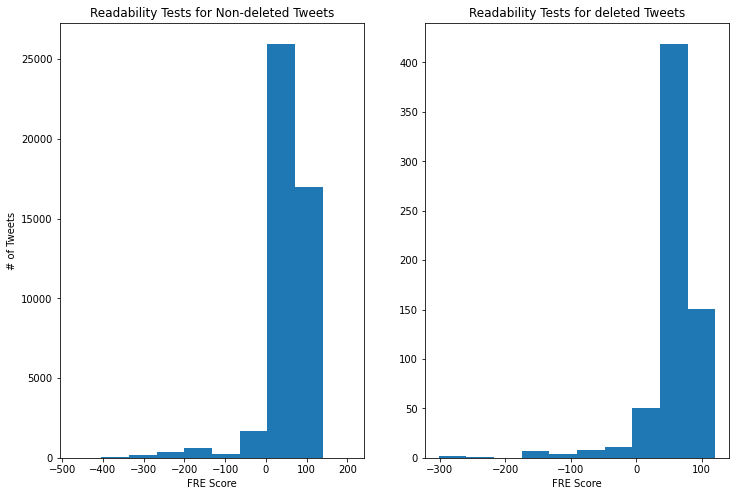

In [30]:
from textstat import flesch_reading_ease


fig, ax = plt.subplots(1, 2, figsize=(12, 8))


ax[0].hist(df_notdeleted['text'].apply(lambda x: flesch_reading_ease(x) if (flesch_reading_ease(x) > -500 and flesch_reading_ease(x) < 250) else 0))
ax[0].set_title('Readability Tests for Non-deleted Tweets'), ax[0].set_xlabel('FRE Score'), ax[0].set_ylabel('# of Tweets')

ax[1].hist(df_deleted['text'].apply(lambda x: flesch_reading_ease(x) if (flesch_reading_ease(x) > -500 and flesch_reading_ease(x) < 250) else 0))
ax[1].set_title('Readability Tests for deleted Tweets'), ax[1].set_xlabel('FRE Score'), ax[0].set_ylabel('# of Tweets')

plt.show()

<a class='anchor' id='4'></a>
## Building a Text Generator

Code created through following keras character documentation:
https://keras.io/examples/generative/lstm_character_level_text_generation/

<a class='anchor' id="4.1"></a>
### Imports

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

import tensorflow
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

import string
import tqdm

In [32]:
print(tensorflow.__version__)

2.3.0


<a anchor='class' id="4.2"></a>
### Preprocessing Text

There are two functions created for cleaning text depending on how the output is wanted: ```clean_text_one``` and ```clean_text_two```. 

```clean_text_one```:
* Removes %, #, @, rt, and links
* Rewrites contractions: won't = will not
* Removes emoticons

```clean_text_two```:
* Remove all punctuation
* Makes all words lowercase

In [58]:
import re
import string

def clean_text_one(txt):
    txt = ' '.join(txt)
    new_text = []
    for word in txt.split():
        new_text.append(word)
        for char in word:
            if char in ['%', '#', '@']:
                new_text.pop()
                break
    
    txt = ' '.join(new_text)
    
    stopwords = ['rt']
    english = [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    output = []
    for word in txt.split(' '):

        #if re.sub(r'^https?:\/\/.*[\r\n]*', '', word, flags=re.MULTILINE) and re.sub(r'[^A-Za-z].*[\r\n]*', '', word, flags=re.MULTILINE):
        #    clean_word = re.sub(r'[^\w\s]', '', word).lower()
        #    #output.append(''.join(clean_word.replace('\n', '')))
        #    output.append(clean_word.replace('\n', ''))

        pattern = re.compile(r'^https?.*[\r\n]*')
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002500-\U00002BEF"  # chinese char
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  # dingbats
            u"\u3030"
                          "]+", re.UNICODE)
        
        if pattern.sub(' ', word) and word.lower() not in stopwords:
            word = str(pattern.sub('', word))
            word = str(emoji_pattern.sub('', word))
            output.append(word.replace('\n', ''))


    txt = ' '.join(output)
    txt = [v for v in txt if (v.lower() in english) or (v.lower() in string.punctuation)]
    txt = contractions.fix(''.join(txt))
    return txt

    
def clean_text_three(df, n_rows):
    hehe = []
    punctuation = '''!()-[]{};:'"\<>/?@#$%^&*_~'''
    english = [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002500-\U00002BEF"  # chinese char
    u"\U00002702-\U000027B0"
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u"\U00010000-\U0010ffff"
    u"\u2640-\u2642" 
    u"\u2600-\u2B55"
    u"\u200d"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\ufe0f"  # dingbats
    u"\u3030"
                  "]+", re.UNICODE)
    
    
    
    for row in df[:n_rows]:
        for word in row.split():
            if word.lower() not in 'rt' and word[0] != '@':
                word = re.sub(r'^https?:\/\/.*[\r\n]*','',word)
                word = str(emoji_pattern.sub('', word))
                word = re.sub(r' +', '',  word)
                word = contractions.fix(word)
                hehe.append(word)

    
    txt = ' '.join(hehe)
    txt = [v for v in txt if (v not in punctuation) and (v.lower() in english)]
    return re.sub(r' +', ' ', ''.join(txt))
    
text = ' '.join(df_notdeleted['text'].head())

In [34]:
print(f'Text before preprocess: \n{text}\n\n\nText after preprocess: \n{clean_text_three(df_notdeleted, n_rows=5)} \n\nCharacters removed: {abs(len(clean_text_one(text))-len(text))} \nWords removed: {abs(len(clean_text_one(text).split()) - len(text.split()))}')

Text before preprocess: 
Republicans and Democrats have both created our economic problems. I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! #KAG2020 https://t.co/dNJZfRsl9y The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, & the Democrats know it. Almost all recent elections using this system, even though much smaller &  with far fewer Ballots to count, have ended up being a disaster. Large numbers of missing Ballots & Fraud! Getting a little exercise this morning! https://t.co/fyAAcbhbgk https://t.co/4qwCKQOiOw


Text after preprocess: 
Republicans and Democrats have both created our economic problems I was thrilled to be back in the Great city of Charlotte North Carolina with thousands of hardworking American Patriots who love our Country cherish our values respect o

<a class='anchor' id="4.3"></a>
### Processing Text

All text output is written into a text file ```trump_tweets```

Read file and store into <b>text</b> object

In [35]:
txt = clean_text_three(df_notdeleted, n_rows=5000)
txt

'Republicans and Democrats have both created our economic problems I was thrilled to be back in the Great city of Charlotte North Carolina with thousands of hardworking American Patriots who love our Country cherish our values respect our laws and always put AMERICA FIRST Thank you for a wonderful evening KAG The Unsolicited Mail In Ballot Scam is a major threat to our Democracy the Democrats know it Almost all recent elections using this system even though much smaller with far fewer Ballots to count have ended up being a disaster Large numbers of missing Ballots Fraud Getting a little exercise this morning Thank you Elise As per your request Joe The threshold identification of Ballots is turning out to be even bigger than originally anticipated A very large number of Ballots are impacted Stay tuned I am running as a proud Democrat for the Senate Sleepy Joe Biden today It is only going to get worse It is not sustainable for our County China will own us HUGE win today for the United St

In [36]:
with open('trump_tweets.txt', 'r', encoding='utf-8') as f:
    text = f.read()

### Converting text to numerical values

Cannort input text data to a model. Instead, we have to follow this process:

<ul>
    <li> Break text into seperate sequences (sentences). Each sequence is broken into two sections </li>
    <ul>
        <li style='list-style-type: square;'>Predictors: All of the characters excluding the last char </li>
        <li style='list-style-type: square;'>Labels: The last char </li>
    </ul>
    <li> Create a dictionary that maps each unique character to a arbitrary value.</li>
    <li> Create x and y matrix. X contains 3D numpy array consisting of shape (# of sentences, length of predictor, length of unique characters. Each 1d array (shape=# of unique characters) consists of a True/False value at each index. The index that is True is the letter at index i of the dictionary    </li>
</ul>

For example, if the first sentence is <i>Republicans and Democrats have both created our economic problems. I was thrilled to be back in the Great city of Charlotte</i>, then x[0][0] would be:

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False] 

Explanation:

The first letter is 'R', which is the 18th letter of the alphabet. In the first 1D array, a letter of each sequence, the 18th index is True, therefore mapping the dictionary that contains char_to_index and the array would give us 'R'.

In [37]:
text = text.replace("\n", " ")  # We remove newlines chars for nicer display
print("Corpus length:", len(text))

chars = sorted(list(set(text)))
print("Total chars:", len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 100
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i : i + maxlen])
    next_chars.append(text[i + maxlen])
print("Number of sequences:", len(sentences))

x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.float32)
y = np.zeros((len(sentences), len(chars)), dtype=np.float32)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Corpus length: 583429
Total chars: 54
Number of sequences: 194443


<a class='anchor' id='4.4'></a>
### Building the Model

LSTM is a more efficient version of a RNN since it solves the <a href='https://www.kdnuggets.com/2022/02/vanishing-gradient-problem.html#:~:text=When%20there%20are%20more%20layers,this%20the%20vanishing%20gradient%20problem.' style='font-size:16px;'>vanishing gradient problem.</a> 

Traditional RNN's were very time/spatial dependent. Imagine reading the sentence <i>John left the door ____</i>. RNN's are able to generate the text 'open'. However, if you have multiple sentences, the context provided further down has less impact. For instance, take the sentences <i>John grew up in spain. He is fluent in ___</i>. The most probable output would be 'spanish'. However, since spain is less recent, the accuracy of an RNN would be much lower than the initial sentence.

LSTM solves this vanishing gradient problem. 

In [38]:
def create_model():
    model = Sequential()

    model.add(LSTM(len(chars)*4, input_shape=(maxlen, len(chars)), return_sequences=True))
    model.add(LSTM(128))
    model.add(BatchNormalization())
    model.add(Activation('selu'))

    model.add(Dense(len(chars)*4))
    model.add(Activation('selu'))

    model.add(Dense(len(chars)*4))
    model.add(BatchNormalization())
    model.add(Activation('selu'))

    model.add(Dense(len(chars), activation='softmax'))

    optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.001)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer)
    
    return model

In [39]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [40]:
model = create_model()

                
checkpoint_path = r'training\check.ckpt'
checkpoint_directory = os.path.dirname(checkpoint_path)

callbacks = [
    EarlyStopping(monitor='loss', patience=2, verbose=0),
    ModelCheckpoint(checkpoint_directory, monitor='loss', verbose=1, save_best_only=True, mode='min')
]


In [41]:
epochs = 20
batch_size = 64

try:
    os.makedirs('Generated Text')
except:
    print('Already exists')


for epoch in range(epochs):
    model.fit(x, y, batch_size=batch_size, epochs=1, callbacks=callbacks)
    print()
    print("Generating text after epoch: %d" % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 0.7]:
        print("...Diversity:", diversity)

        generated = ""
        sentence = text[start_index : start_index + maxlen]
        print('...Generating with seed: "' + sentence + '"')

        for i in range(120):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.0
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
            sentence = sentence[1:] + next_char
            generated += next_char

        with open(os.path.join('Generated Text', f'gen_text_batch: {batch_size} batches,  epoch: {epoch}'), 'a', encoding='utf-8') as f:
            f.write(f'"...Diversity:" {diversity} \n"...Generating with seed: " {sentence}\n ...Generated: {generated}\n\n')


        print("...Generated: ", generated)
        print()

Already exists
 715/3039 [======>.......................] - ETA: 5:13 - loss: 2.6414

KeyboardInterrupt: 

In [54]:
import copy
def generate_text(seed, n_chars):
    model.load_weights('test_generation_2.h5') 

    seed = seed

    # To print original
    seed_new = copy.deepcopy(seed)
    n_chars = n_chars
    sequence_length = 120

    generated = ""
    for i in tqdm.tqdm(range(n_chars), "Generating text"):
        # make the input sequence
        X = np.zeros((1, sequence_length, len(chars)))
        for t, char in enumerate(seed):
            X[0, (sequence_length - len(seed)) + t, char_indices[char]] = 1
        # predict the next character
        predicted = model.predict(X, verbose=0)[0]
        # converting the vector to an integer
        next_index = np.argmax(predicted)
        # converting the integer to a character
        next_char = indices_char[next_index]
        # add the character to results
        generated += next_char
        # shift seed and the predicted character
        seed = seed[1:] + next_char

    print("Original Seed:", seed_new)
    print("Generated text:")
    print(generated)

<a class='anchor' id='4.5'></a>
### Generating Output

<a class='anchor' id='4.6'></a>
### Example generated tweet

<i>It is not always possible to be the best, but it is always possible to improve your own performance</i> - Jackie Stewart

Although the model can generate a reasonable sounding tweet, it cannot always do that. In this case, it can take up to 20+ other tweets to get one that is remotely usable. I will continue trial-and-error with the model until it has to take less tweets to generate.



# Live Tweeting

Everyday, there is always something happening in the world. Although it can be dangerous and misleading to create an opinion on breaking news, or before more information comes out, it is human-nature to have an opinion on something when we first hear about it. 

## Purpose

Some news medias have public Application Programming Interfaces (APIs). APIs are a way for computer(s) to communicate with each other through requests and responses. For instance, imagine trying to open ```https://www.youtube.com/```. Immediately, a TCP (Transmission Control Protocol, which manages the transfer of information (packets) between the computers) is established. Your computer sends a GET request to youtube's client. Essentially, your computer takes the HTTP, extracts it, checks the domain, the part after the http, and asks the Domain Name Server to return the respected IP address. After receiving the IP address, it will initiate the GET request, which the server will send a response.


There are numerous media websites that serve public API's. Some include:

* Google News
* New York TImes
* Bloomberg
* Yahoo News
* BBC News



In [44]:
from pynytimes import NYTAPI as api

# Initialize api object
api_key = 'nZfdD4QhOWpNGJ3WszaxFh3nL9n19Ydw'
nyt = api(api_key, parse_dates=True)

# Get top stories in the politics section
top_stories = nyt.top_stories(section='politics')

### What does top_stories contain?

Top Stories is a dictionary with keys: <br>
```section```, ```subsection```, ```title```, ```abstract```, ```url```, ```uri```, ```byline```, ```item_type```, ```updated_date```, ```created_date```, ```published_date```, ```material_type_facet```, ```kicker```, ```des_facet```, ```org_facet```, ```per_facet```, ```geo_facet```, ```multimedia```,  ```short_url```

### Create dataframe

Dataframe should contain ```title```, ```abstraction```, ```caption```, ```url```, ```section```

In [46]:
posts = []

for story in top_stories:
    posts.append([story['title'], story['abstract'], story['multimedia'][0]['caption'], story['url'], story['subsection']])
    
df_stories = pd.DataFrame(posts, columns=['Title', 'Abstraction', 'Caption', 'url', 'section'])
df_stories.head()

,Title,Abstraction,Caption,url,section
0,Senate G.O.P. Campaign Arm Slashes TV Ad Buys ...,In a sign that fund-raising trouble is taking ...,"Mehmet Oz campaigning in Swatara Township, Pa....",https://www.nytimes.com/2022/08/15/us/politics...,politics
1,Plaintiffs in Long Fight Over Endangered Salmo...,The Biden administration is in talks with trib...,Activists gathered outside the U.S. Army Corps...,https://www.nytimes.com/2022/08/15/us/politics...,politics
2,"In Wisconsin, 2 Huge Races Stand Between G.O.P...","The governor’s race this fall, along with a pi...","Tim Michels, at a rally with former President ...",https://www.nytimes.com/2022/08/15/us/politics...,politics
3,The Arizona Republican Party’s Anti-Democracy ...,"First, it turned against the establishment. No...",A primary eve rally in Phoenix featuring onsta...,https://www.nytimes.com/2022/08/15/magazine/ar...,
4,"In Wyoming, Likely End of Cheney Dynasty Will ...",If Representative Liz Cheney loses her primary...,"Representative Liz Cheney, whose recent focus ...",https://www.nytimes.com/2022/08/15/us/politics...,politics


In [65]:
top_story = clean_text_three(df_stories['Title'],n_rows=1)
generate_text(top_story, 120)

Generating text: 100%|███████████████████████████████████████████████████████████████| 120/120 [00:03<00:00, 34.18it/s]

Original Seed: Senate GOP Campaign Arm Slashes TV Ad Buys in Three States
Generated text:
 Countries is the fact the people of Wesl Very and for the USA is the first time of the United States Courage The United
